# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

# Loading the data

In [2]:
# Reading and Understanding the Data
file_path = "/kaggle/input/advertising-dataset/advertising.csv"
df = pd.read_csv(file_path)

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Exploratory Data Analysis

In [4]:
# first 5 rows
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# statistical information about the data
df.describe(include="all")

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# shape of the data
df.shape

(200, 4)

In [8]:
# check the duplicated data
df.duplicated().sum()

0

In [9]:
# Data Cleaning (Checking for missing values)
print("Missing values:")
print(df.isnull().sum())

Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

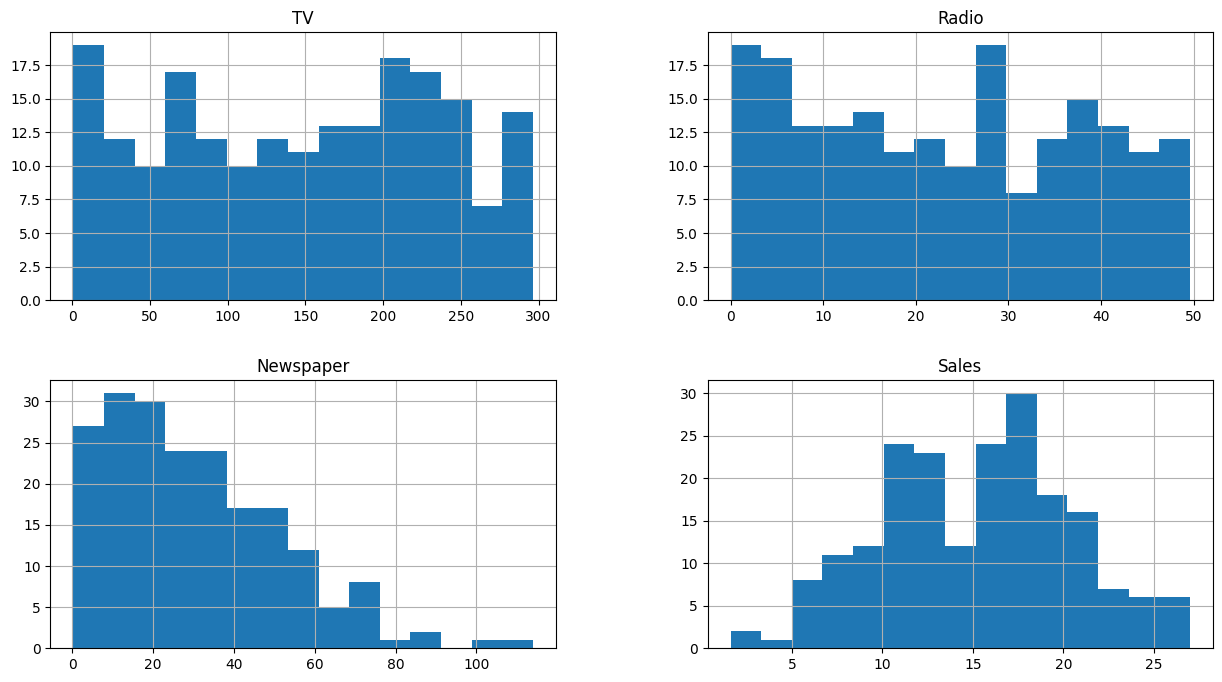

In [10]:
#histograms for all the columns
df.hist(bins = 15, figsize = (15, 8))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

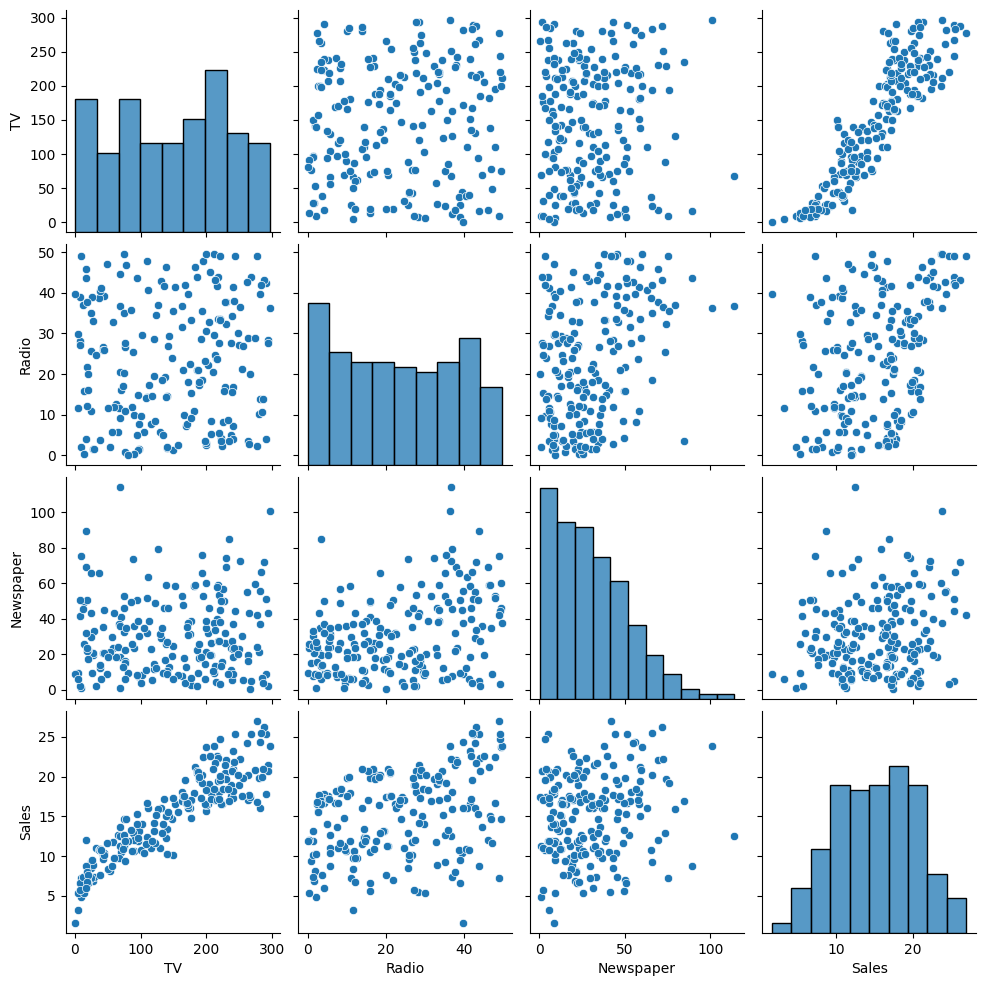

In [11]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

**Correlation matrix**

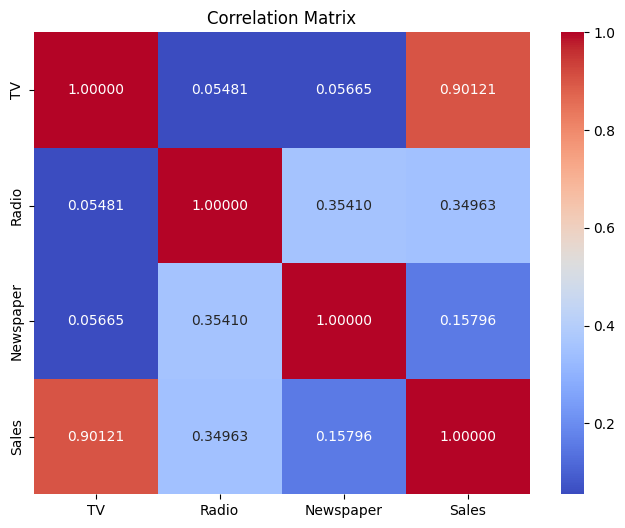

In [12]:
correlation= df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.5f')
plt.title('Correlation Matrix')
plt.show()

**Data Distribution and visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


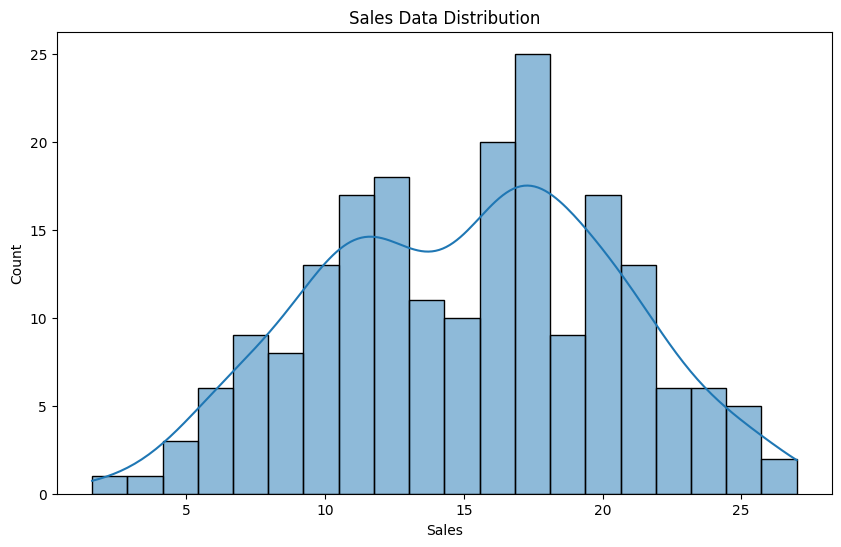

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=20)
plt.title("Sales Data Distribution")
plt.show()

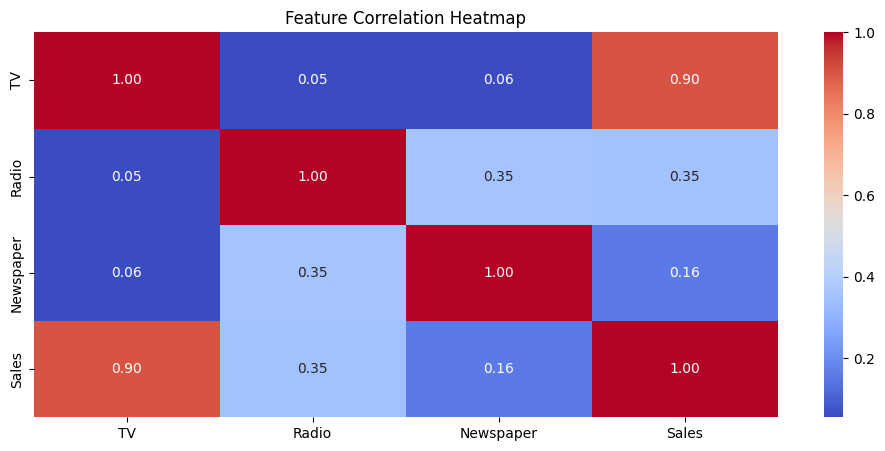

In [14]:
# Feature-Target Relationship Visualization
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing

In [15]:
#scale the features
features = ['TV', 'Radio', 'Newspaper']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9
...,...,...,...,...
195,0.126818,0.074597,0.118734,7.6
196,0.316199,0.098790,0.068602,14.0
197,0.596212,0.187500,0.053650,14.8
198,0.956713,0.846774,0.579595,25.5


# Modelling

**Model Building**

In [16]:
# Model Building
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

In [18]:
# Model evaluating
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

Model Coefficients: [16.11839139  5.00688997  0.49307674]
Intercept: 4.753583885846798
RMSE: 1.7052146229349217
MAE: 1.2748262109549326
R² Score: 0.9059011844150827


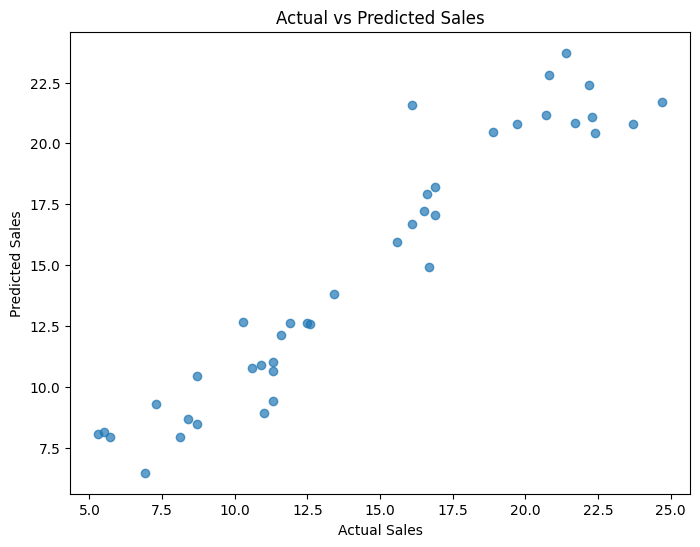

In [19]:
# Visualization of Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Testing

In [20]:
# Predict sales for a new advertising budget
new_data = pd.DataFrame({'TV': [200], 'Radio': [30], 'Newspaper': [20]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 3388.5000953130448


In [21]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.9059011844150827
